<a href="https://colab.research.google.com/github/vtu22710-oi/data-visualization/blob/main/DV_T_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

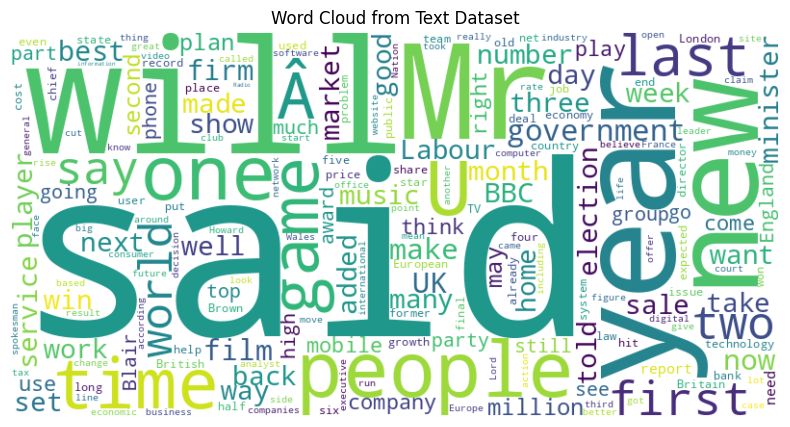

Word cloud generated successfully! The image will be displayed in a new window.


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/df_file.csv')

# Step 2: Combine all text from the 'Text' column into a single string
# We'll replace any missing values with an empty string to avoid errors
all_text = ' '.join(df['Text'].dropna().astype(str))

# Step 3: Generate the Word Cloud
# You can customize parameters like width, height, background color, and stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    collocations=False, # Set to False to prevent generating word pairs
).generate(all_text)

# Step 4: Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axes for a cleaner look
plt.title('Word Cloud from Text Dataset')
plt.show()

# Optional: Save the word cloud image to a file
# wordcloud.to_file('text_dataset_wordcloud.png')

print("Word cloud generated successfully! The image will be displayed in a new window.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


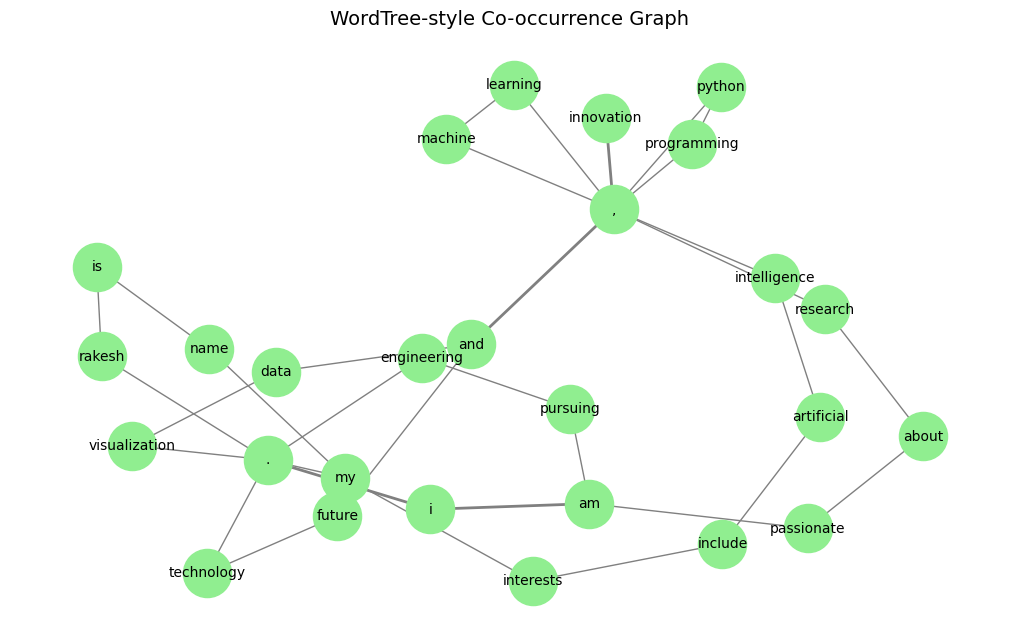

In [ ]:
# ==============================
# 7b) WordTree-style Graph (Fixed)
# ==============================

# Install libraries
!pip install nltk networkx matplotlib

import nltk
import networkx as nx
import matplotlib.pyplot as plt

# ✅ Download required tokenizers
nltk.download("punkt")
nltk.download("punkt_tab")

# Example text (replace with your dataset or personal details)
text = """
My name is Rakesh. I am pursuing engineering.
My interests include Artificial Intelligence, Machine Learning,
Python programming, and Data Visualization.
I am passionate about research, innovation, and future technology.
"""

# Tokenize words
words = nltk.word_tokenize(text.lower())

# Build co-occurrence pairs (like a WordTree structure)
window_size = 2
pairs = []
for i in range(len(words) - window_size + 1):
    pair = (words[i], words[i+1])
    pairs.append(pair)

# Build graph
G = nx.Graph()
for w1, w2 in pairs:
    if G.has_edge(w1, w2):
        G[w1][w2]["weight"] += 1
    else:
        G.add_edge(w1, w2, weight=1)

# Plot WordTree Graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, k=0.5, iterations=50)
edge_weights = [d["weight"] for (_, _, d) in G.edges(data=True)]

nx.draw(
    G, pos,
    with_labels=True,
    node_color="lightgreen",
    node_size=1200,
    font_size=10,
    width=edge_weights,
    edge_color="gray"
)

plt.title("WordTree-style Co-occurrence Graph", fontsize=14)
plt.show()